In [1]:
import os
os.chdir("../")

import pickle
from helpers.classes import EVENT_DICTIONARY_V2_ALIVE as event_enc

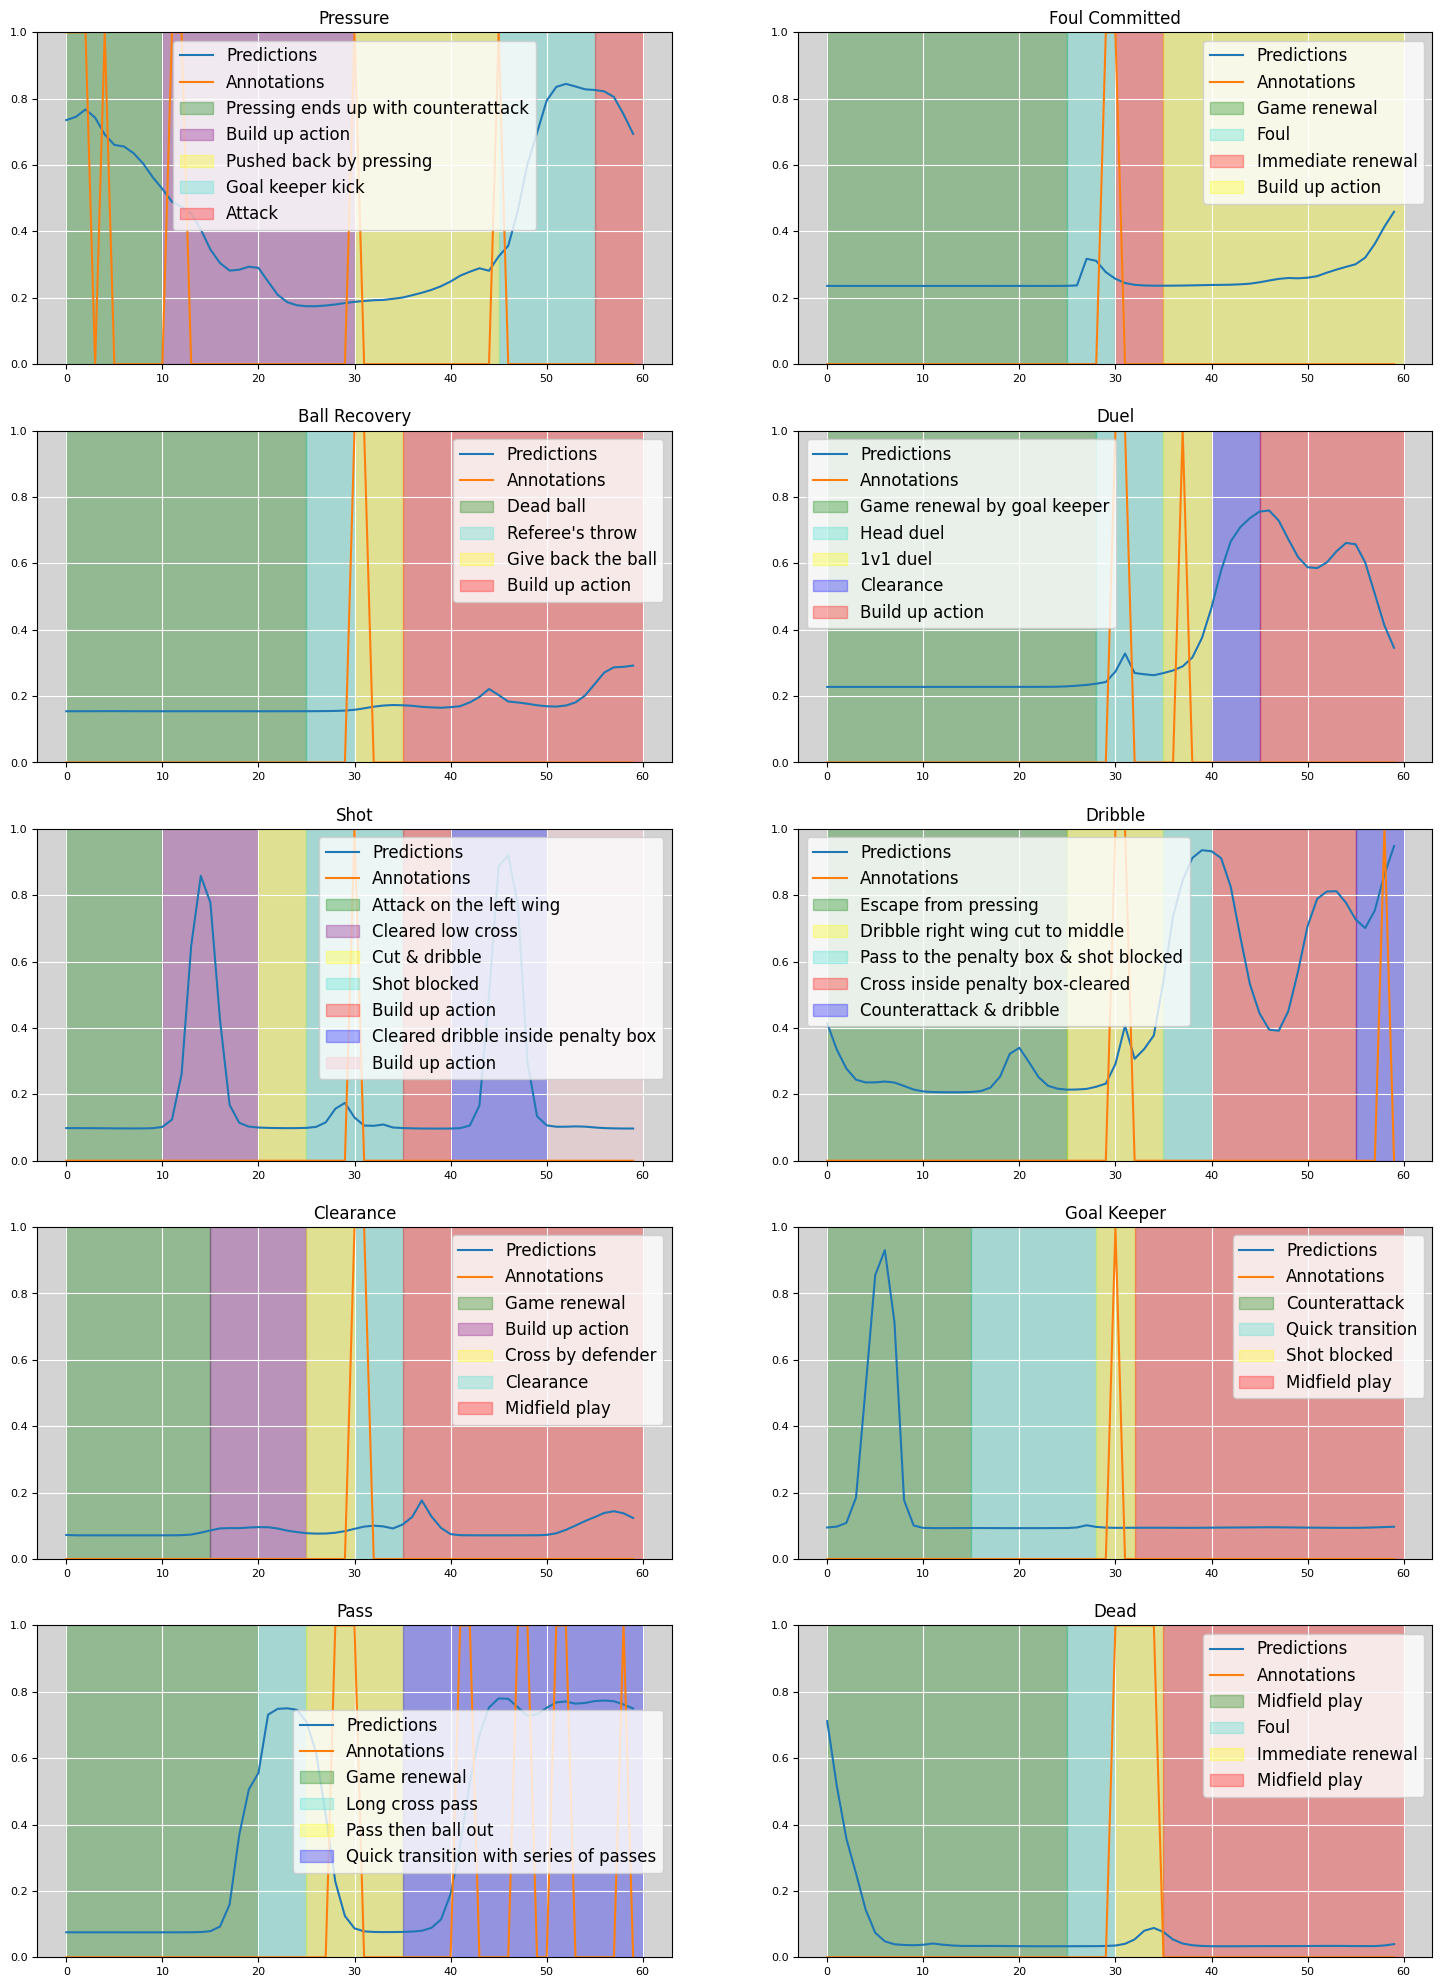

In [9]:
import matplotlib.pyplot as plt
# context = [
#     [[(0, 10, "green","Attack inside penalty box"), (10, 20, "purple", "Counterattack right wing"), (20, 25, "yellow", "Cut to the left"), (25, 35, "turquoise", "Shot blocked"), (35, 60, "red", "Build up of the action")],
#     [(0, 25, "green","Build up action"), (25, 35, "yellow", "Shot"), (35, 60, "red", "Corner preperation")],
#     [(0, 10, "green","Attack on the left wing"), (10, 20, "purple", "Cleared low cross"), (20, 25, "yellow", "Cut & dribble"), (25, 35, "turquoise", "Shot blocked"), (35, 40, "red", "Build up action"), (40, 50, "blue", "Cleared dribble inside penalty box"), (50, 60, "pink", "Build up action")],
#     [(0, 25, "green","Build up action"), (25, 35, "purple", "Shot blocked"), (35, 45, "yellow", "Further attack"), (45, 55, "turquoise", "Pass inside the penalty box-cleared"), (55, 60, "red", "Foul")]],
    
#     [[(0, 22, "green","Corner"), (22, 27, "purple", "Counterattack left wing"), (27, 35, "yellow", "Dribble left wing"), (35, 40, "turquoise", "Pass to the penalty box & shot blocked"), (40, 45, "red", "Shot from distance"), (45, 60, "blue", "Corner preperation")],
#     [(0, 25, "green","Escape from pressing"), (25, 35, "yellow", "Dribble right wing cut to middle"), (35, 40, "turquoise", "Pass to the penalty box & shot blocked"), (40, 55, "red", "Cross inside penalty box-cleared"), (55, 60, "blue", "Counterattack & dribble")],
#     [(0, 28, "green","Build up action"), (28, 40, "turquoise", "Two consequent dribbles"), (40, 60, "yellow", "Foul")],
#     [(0, 5, "green","Build up action"), (5, 20, "purple", "Dribble & 1v1"), (20, 25, "yellow", "Counterattack"), (25, 35, "turquoise", "Dribble"), (35, 50, "red", "Opposite attack"), (50, 55, "blue", "Dribble like attack"), (55, 60, "pink", "Cross inside penalty box")]],

#     [[(0, 25, "green","Dead ball"), (25, 35, "turquoise", "Referee's throw"), (35, 60, "yellow", "Build up action")],
#     [(0, 25, "green","Build up action"), (25, 28, "yellow", "Goal keeper kicks the ball"), (28, 35, "turquoise", "Received by opposite defender"), (35, 60, "red", "Build up action")],
#     [(0, 25, "green","Build up action"), (25, 40, "turquoise", "Two consequent dribbles"), (40, 60, "yellow", "Foul")],
#     [(0, 5, "green","Build up action"), (5, 20, "purple", "Dribble & 1v1"), (20, 25, "yellow", "Counterattack"), (25, 35, "turquoise", "Dribble"), (35, 50, "red", "Opposite attack"), (50, 55, "blue", "Dribble like attack"), (55, 60, "pink", "Cross inside penalty box")]]
#     ]
selected_anns = {
    "Pressure": "missed_pressureGAT", 
    "Foul Committed": "missed_foulGAT", 
    "Ball Recovery": "missed_ball_recoveryGAT", 
    "Duel": "missed_duelGAT", 
    "Shot": "missed_shotGAT", 
    "Dribble": "missed_dribbleGAT", 
    "Clearance": "missed_clearanceGAT",
    "Goal Keeper": "missed_goal_keeperGAT",
    "Pass": "missed_passGAT",
    "Dead": "missed_deadGAT"
    }

selected_event = {
    "Pressure": "0", 
    "Foul Committed": "0", 
    "Ball Recovery": "0", 
    "Duel": "0", 
    "Shot": "2", 
    "Dribble": "1", 
    "Clearance": "0",
    "Goal Keeper": "0",
    "Pass": "0",
    "Dead": "0"
    }

context = {
    "Pressure": [(0, 10, "green","Pressing ends up with counterattack"), 
                 (10, 30, "purple", "Build up action"), 
                 (30, 45, "yellow", "Pushed back by pressing"), 
                 (45, 55, "turquoise", "Goal keeper kick"), 
                 (55, 60, "red", "Attack")], 

    "Foul Committed": [(0, 25, "green","Game renewal"), 
                      (25, 30, "turquoise", "Foul"), 
                      (30, 35, "red", "Immediate renewal"), 
                      (35, 60, "yellow", "Build up action")], 

    "Ball Recovery": [(0, 25, "green","Dead ball"), 
                      (25, 30, "turquoise", "Referee's throw"), 
                      (30, 35, "yellow", "Give back the ball"), 
                      (35, 60, "red", "Build up action")], 

    "Duel": [(0, 28, "green","Game renewal by goal keeper"), 
            (28, 35, "turquoise", "Head duel"), 
            (35, 40, "yellow", "1v1 duel"), 
            (40, 45, "blue", "Clearance"),
            (45, 60, "red", "Build up action")], 

    "Shot": [(0, 10, "green","Attack on the left wing"), 
                 (10, 20, "purple", "Cleared low cross"), 
                 (20, 25, "yellow", "Cut & dribble"), 
                 (25, 35, "turquoise", "Shot blocked"), 
                 (35, 40, "red", "Build up action"), 
                 (40, 50, "blue", "Cleared dribble inside penalty box"), 
                 (50, 60, "pink", "Build up action")], 

    "Dribble": [(0, 25, "green","Escape from pressing"), 
                (25, 35, "yellow", "Dribble right wing cut to middle"), 
                (35, 40, "turquoise", "Pass to the penalty box & shot blocked"), 
                (40, 55, "red", "Cross inside penalty box-cleared"), 
                (55, 60, "blue", "Counterattack & dribble")], 
                
    "Clearance": [(0, 15, "green","Game renewal"), 
                 (15, 25, "purple", "Build up action"), 
                 (25, 30, "yellow", "Cross by defender"), 
                 (30, 35, "turquoise", "Clearance"),
                 (35, 60, "red", "Midfield play")],

    "Goal Keeper": [(0, 15, "green","Counterattack"), 
                    (15, 28, "turquoise", "Quick transition"), 
                    (28, 32, "yellow", "Shot blocked"), 
                    (32, 60, "red", "Midfield play")],

    "Pass": [(0, 20, "green","Game renewal"), 
            (20, 25, "turquoise", "Long cross pass"), 
            (25, 35, "yellow", "Pass then ball out"), 
            (35, 60, "blue", "Quick transition with series of passes")],

    "Dead": [(0, 25, "green","Midfield play"), 
            (25, 30, "turquoise", "Foul"), 
            (30, 35, "yellow", "Immediate renewal"), 
            (35, 60, "red", "Midfield play")]
    }

cols=2
rows=5
fig, axes = plt.subplots(rows, cols, figsize=(9*cols, 5*rows))
for i, (ann, ax) in enumerate(zip(selected_anns.keys(), axes.flatten())):
    file_name = f'animations/{selected_anns[ann]}/{selected_event[ann]}/predictions.pkl'
    with open(file_name, 'rb') as f:
        results, annotations = pickle.load(f)

    ax.set_title(f'{ann}', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.set_ylim(0,1)
    ax.set_facecolor('lightgray') 
    ax.grid(True, color='white')
    ax.plot(results[:,event_enc[ann]], label="Predictions")
    ax.plot(annotations[:,event_enc[ann]], label="Annotations")
    for start, end, color, label in context[ann]:
        ax.axvspan(start, end, color=color, alpha=0.3,label=label)  
    ax.legend(fontsize='large')

# fig.suptitle('Missed Predictions', fontsize=16)
plt.show()